# Optimal Bayes Classifier - Notebook


### Comparing Optimal Bayes and Naive Bayes using simulated Gaussian data for non-zero covariance.

#### Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB

%matplotlib inline
sns.set()

#### Data Generation

In [2]:
# Data generation

#data of Gaussian Distributions

#distribution 1
mu1 = [2, 2]
sigma1 = [[5, 4], [4, 5]]  
x1, y1 = np.random.multivariate_normal(mu1, sigma1, 100).T

#distribution 2
mu2 = [-2, -2]
sigma2 = [[3, -2], [-2, 3]]  
x2, y2 = np.random.multivariate_normal(mu2, sigma2, 100).T

In [3]:
# Define constants and variables

N = 100
X = np.linspace(-10, 10, N)
Y = np.linspace(-10, 10, N)
means_of_distribution = [mu1,mu2]
sigma_of_distributions = [sigma1,sigma2]
color_list = ['blue','green']


In [4]:
def predict_optimal_Bayes(data,mu_list,sigma_list): 
    #Returns the predicted class from an optimal bayes classifier
    
    scores_list = []
    classes = len(mu_list)
    
    for p in range(classes):
        score = scipy.stats.multivariate_normal.pdf(data, mean=mu_list[p], cov=sigma_list[p])
        scores_list.append(score)
             
    return np.argmax(scores_list)

In [5]:
# Prepare data for modelling

X_data = np.asarray(np.vstack((np.hstack((x1,x2)),np.hstack((y1,y2)))).T)
y_labels = np.hstack((np.zeros(100),np.ones(100)))

X, Y = np.meshgrid(X, Y)

#### Excercise: A) Plot the decision boundary

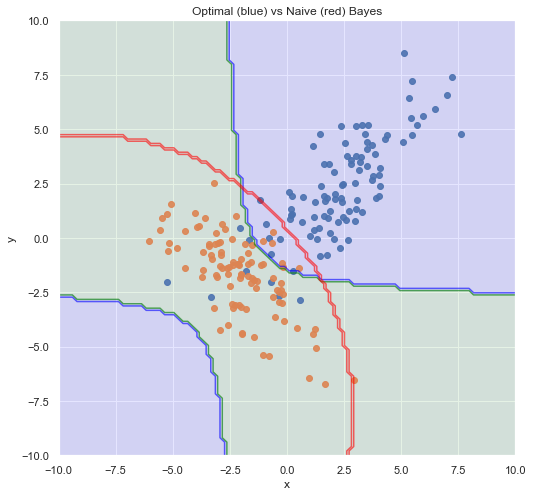

In [6]:
# Our 2-dimensional distribution will be over variables X and Y

#Setup of figure
fig = plt.figure(figsize = (18,8))
ax = fig.add_subplot(1, 2, 1)

#######################################################################

# Optimal Bayes classifier


#Plotting the contours of the Gaussians 

zz = np.array([ predict_optimal_Bayes(np.array([xx,yy]),means_of_distribution,sigma_of_distributions) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)

#Plot the  contours
ax.contour( X, Y, Z, 1, alpha = .6, colors = ('blue','green'))
ax.contourf( X, Y, Z, 1, alpha = .1, colors = ('blue','green'))

#######################################################################

#Naive Bayes Classifier

#Fit model
model_nb = GaussianNB(priors = None)
model_nb.fit(X_data,y_labels)

#Predictions for each point on meshgrid
zz = np.array([model_nb.predict( [[xx,yy]])[0] for xx, yy in zip(np.ravel(X), np.ravel(Y))] )

#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)

#Plot the  contours
ax.contour( X, Y, Z, 1, alpha = .6, colors = ('red'))

#######################################################################

#Plot the comparision of models

ax.scatter(x1, y1, alpha = .9)
ax.scatter(x2, y2, alpha = .9)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Optimal (blue) vs Naive (red) Bayes')

plt.show()

#### Excercise: B) Accuracies

In [7]:
################## EXCERCISE - Write the code below ##################
"""
Code for comparing the accuracies of the optimal and the naive Bayes classifiers goes here
"""
#Optimal Bayes accuracy

X_data_distribution_1 = np.ndarray.flatten(X_data[:,0])
X_data_disitribution_2 = np.ndarray.flatten(X_data[:,1])

flatten_points = zip(X_data_distribution_1 , X_data_disitribution_2)

y_pred = np.array( [predict_optimal_Bayes(np.array([xx,yy]),means_of_distribution,sigma_of_distributions) for xx, yy in flatten_points ] )
display(np.mean(y_pred == y_labels))

#Naive Bayes accuracy
display(model_nb.score(X_data,y_labels))


0.93

0.93

In [1]:
# Conclusion: 

# Optimal classifier presents the lowest probability of misclassifying the samples. 
# It requires that we know the posterior distribution of data. But in real life this is not known. 
# Hence, Naive bayes model is a better option for practicle use. It doesnt require us to know posterior distribution and estimates it. It assumes independence of predictors.